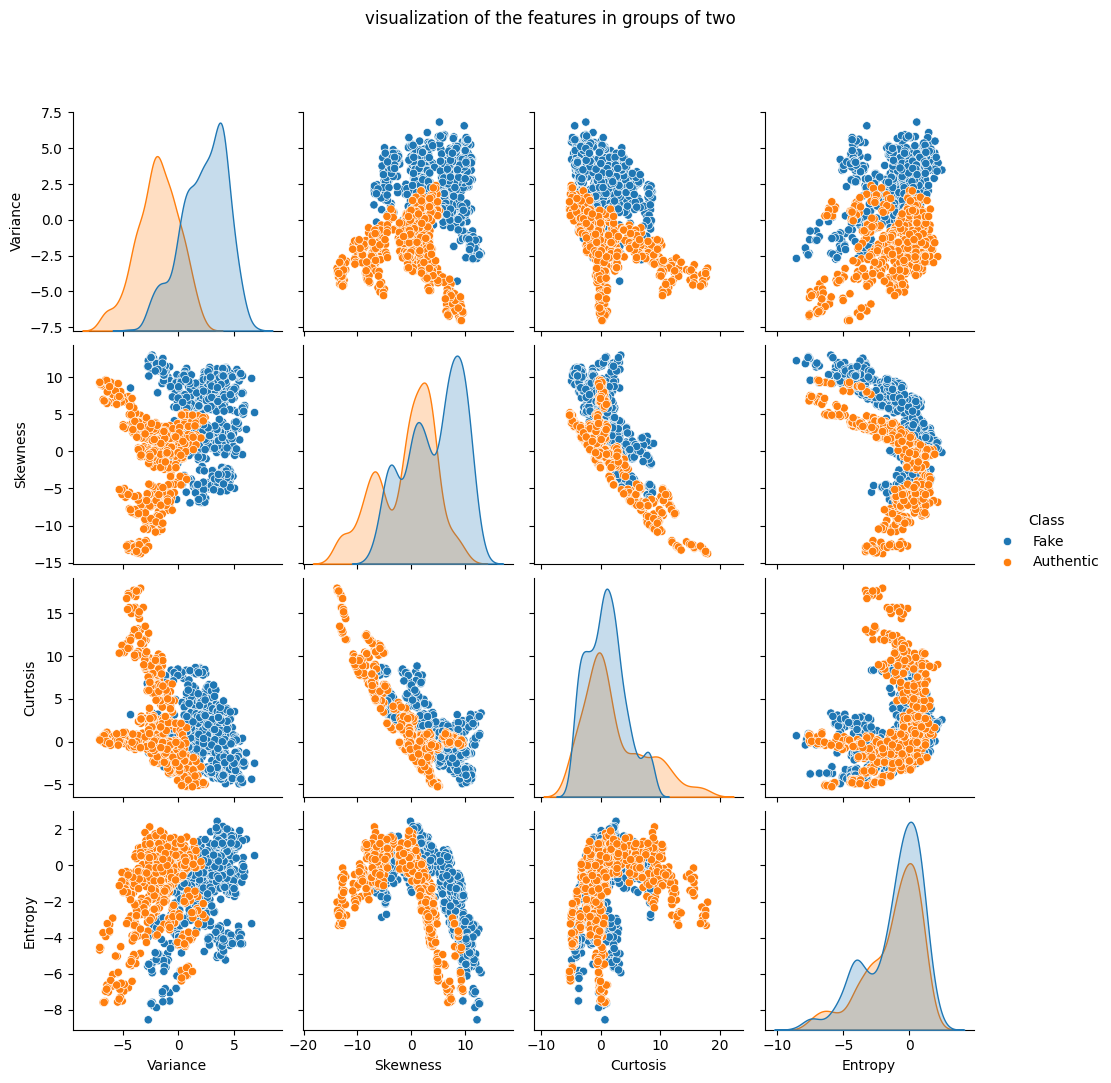

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       153
           1       0.88      0.96      0.92       122

    accuracy                           0.92       275
   macro avg       0.92      0.93      0.92       275
weighted avg       0.93      0.92      0.92       275



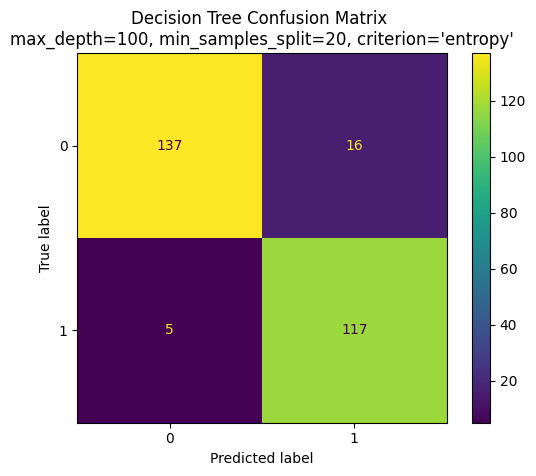

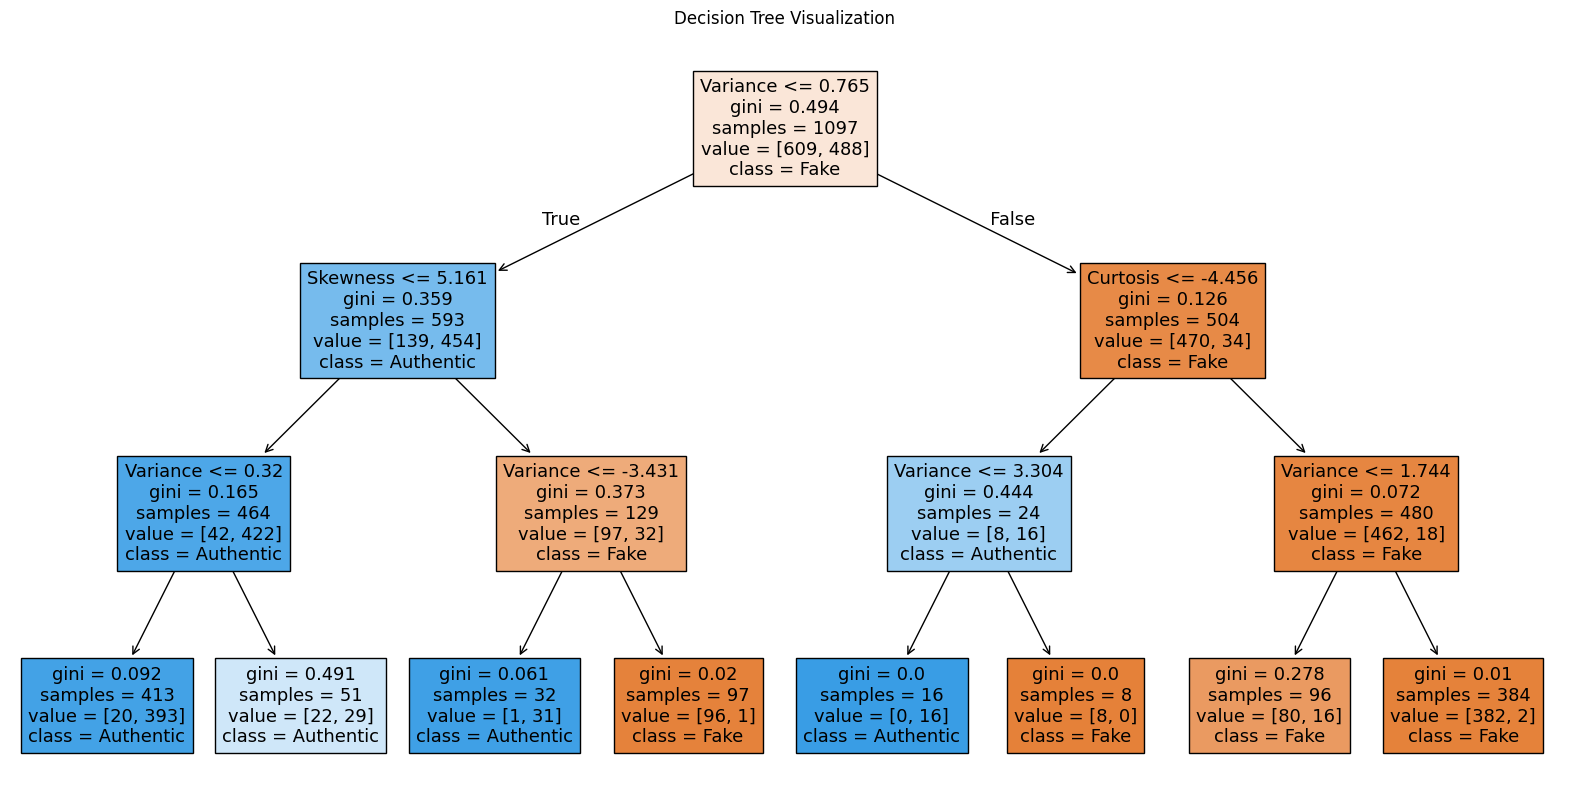

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
#loading the dataset
bankNote = pd.read_csv('banknote.txt', header=None)

#adding column names based on the feature names for this dataset
bankNote.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

#visualization of the features in groups of two
di= {0: 'Fake', 1: 'Authentic'} # dictionary
before= sns.pairplot(bankNote.replace({'Class': di}), hue= 'Class')
before.fig.suptitle('visualization of the features in groups of two', y=1.08)
plt.show()

#splitting the dataset
x = bankNote.iloc[:, :-1]
y = bankNote.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

#implementing the decision tree algorithm and experimenting with different values for max_depth, min_samples_split, and criterion
decTr = DecisionTreeClassifier(max_depth=3, min_samples_split=2, criterion='gini', random_state=42)
decTr.fit(x_train, y_train)

#model training
y_pred = decTr.predict(x_test)

#computing accuracy, precision, recall, and F1-score
print(classification_report(y_test, y_pred))

#confusion Matrix
ConfusionMatrixDisplay.from_estimator(decTr, x_test, y_test)
plt.title("Decision Tree Confusion Matrix \nmax_depth=100, min_samples_split=20, criterion='entropy'")
plt.show()

#decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(decTr, filled=True, feature_names=x.columns, class_names=['Fake', 'Authentic'])
plt.title("Decision Tree Visualization")
plt.show()